In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [2]:
data = pd.read_csv("wine_reviews.csv")

In [3]:
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "red",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}

In [4]:
print('{0:^25} {1:^10} {2:^10} {3:^10}'.format("Name","Type","Unique","Null"))
print('{0:-^25} {1:-^10} {2:-^10} {3:-^10}'.format("","","",""))
for column in data.columns:
    print('{0:25} {1:^10} {2:^10} {3:^10}'.format(column,str(data[column].dtype),len(data[column].unique()),data[column].isna().sum()))
print('\nCount columns: {0}, Count rows: {1}'.format(len(data.columns),len(data.index)))

          Name               Type      Unique      Null   
------------------------- ---------- ---------- ----------
country                     object       38         0     
description                 object     18880        0     
designation                 object      8880       6001   
points                      int64        21         0     
price                      float64      211        1802   
province                    object      314         0     
region_1                    object      878        3457   
region_2                    object       19       11942   
variety                     object      420         0     
winery                      object      7454        0     

Count columns: 10, Count rows: 20000


In [5]:
data.groupby("province")["points"].mean().sort_values(ascending=False).head(3)

province
Martinborough Terrace    93.0
Eisenberg                92.0
Minho                    92.0
Name: points, dtype: float64

In [6]:
data["color"] = data["variety"].map(color)

In [7]:
data = data.dropna(subset=["color"])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


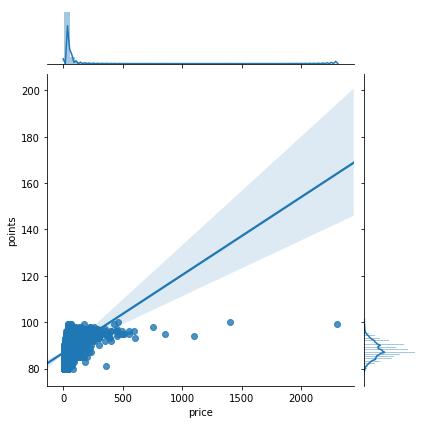

In [19]:
sns.jointplot(x="price", y="points", data=data, kind='reg')

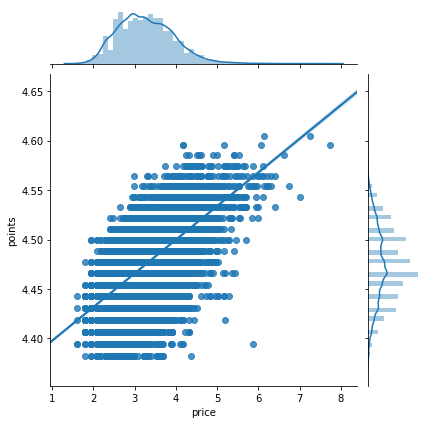

In [9]:
sns.jointplot(x=np.log(data["price"]), y=np.log(data["points"]), kind='reg')

In [10]:
data.groupby("country")["color"].value_counts(normalize=True).head(10)

country    color
Argentina  red      0.842105
           white    0.138756
           other    0.019139
Australia  red      0.706693
           white    0.265748
           other    0.027559
Austria    white    0.630000
           red      0.350000
           other    0.020000
Brazil     other    1.000000
Name: color, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data["price"].fillna(value=data["price"].mean(), inplace=True)

data["price_log"] = np.log(data["price"])
data["points_log"] = np.log(data["points"])

X = data[["price_log"]].values
y = data["points_log"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

print('Slope: {:.2f}, Intercept: {:.2f}'.format(lr.coef_[0],lr.intercept_))
#При изменении логарифма цены на 1 логарифм оценки изменится на 0.03

Slope: 0.03, Intercept: 4.36


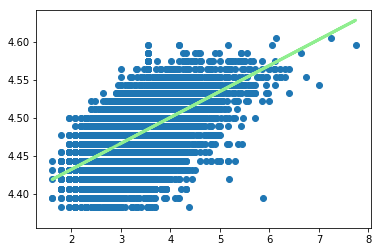

In [14]:
plt.scatter(X, y)
plt.plot(X_test, y_test_pred, color='LightGreen', linewidth=3)

In [15]:
print('MSE test: {:.3f}, R^2 test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

MSE test: 0.001, R^2 test: 0.359


In [16]:
dummies = pd.get_dummies(data["color"], drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,color,price_log,points_log,red,white
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red,3.135494,4.454347,1,0
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,red,5.616771,4.564348,1,0
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,red,3.688879,4.510860,1,0


In [17]:
X = data[["price_log", "red", "white"]].values
y = data["points_log"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

y_train_pred = lr2.predict(X_train)
y_test_pred = lr2.predict(X_test)

print('Slope: {:.2f}, Intercept: {:.2f}'.format(lr.coef_[0],lr.intercept_))

Slope: 0.03, Intercept: 4.36


In [18]:
print('MSE test: {:.3f}, R^2 test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))
#Качество немного уменьшилось

MSE test: 0.001, R^2 test: 0.352
